# Grupo 3 - Estatística Descritiva - Análise do dataset: "**Histórico de Vendas de Filmes nos Cinemas**"

**Integrantes:**

- Gabriel
- Gabriela Almeida
- Larissa Oliveira
- Livia Nobre
- Májda Alvarenga
- Nícolas Zocche


> Santander Coders 2024.1

> Turma #1175 - Data Science

> Professor Damodara Barbosa - Estatística I


---





## Imports e leitura do dataset:

In [ ]:
import kagglehub
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from prettytable import PrettyTable
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller

## Sobre o Dataset


---



O dataset contém dados da indústria cinematográfica, com histórico de vendas de diferentes filmes em cinemas ao longo de oito meses, durante o ano de 2018, com locais anonimizados e codificados.

Há informações sobre  as vendas totais por data, cinema, filme e tempo de exibição, além da porcentagem de ocupação em relação à capacidade disponível. Também contém informações sobre cancelamentos de ingressos.


---
Fonte:

• https://www.kaggle.com/datasets/arashnic/cinema-ticket/data


In [ ]:
# Download da Versão no Kaggle
path = kagglehub.dataset_download("arashnic/cinema-ticket")

print("Path to dataset files:", path)

for root, dirs, files in os.walk(path):
    for file in files:
        print(os.path.join(root, file))

csv_file = '/root/.cache/kagglehub/datasets/arashnic/cinema-ticket/versions/2/cinemaTicket_Ref.csv'

df = pd.read_csv(csv_file)



100%|██████████| 3.27M/3.27M [00:00<00:00, 119MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/arashnic/cinema-ticket/versions/2
/root/.cache/kagglehub/datasets/arashnic/cinema-ticket/versions/2/cinemaTicket_Ref.csv


In [ ]:
print(f'Há {df.shape[0]} linhas e {df.shape[1]} colunas.\n\n')

print('As primeiras linhas do dataset podem ser vistas abaixo: ')
df.head()

Há 142524 linhas e 14 colunas.


As primeiras linhas do dataset podem ser vistas abaixo: 


,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
0,1492,304,3900000,26,0,4,4.26,150000.0,26,610.328638,2018-05-05,5,2,5
1,1492,352,3360000,42,0,5,8.08,80000.0,42,519.801980,2018-05-05,5,2,5
2,1492,489,2560000,32,0,4,20.00,80000.0,32,160.000000,2018-05-05,5,2,5
3,1492,429,1200000,12,0,1,11.01,100000.0,12,108.991826,2018-05-05,5,2,5
4,1492,524,1200000,15,0,3,16.67,80000.0,15,89.982004,2018-05-05,5,2,5


## Quais são as variáveis (colunas) neste conjunto de dados e qual é o tipo de cada uma?


---



**Dicionário das variáveis:**

  - **film_code:** Identificador único para cada filme.
  - **cinema_code:** Identificador único para cada cinema.
  - **total_sales:** Vendas totais por sessão.
  - **tickets_sold:** Número total de ingressos vendidos.
  - **tickets_out:** Número de ingressos cancelados.
  - **show_time:** Tempo de exibição de cada dia.
  - **occu_perc:** Percentual de ocupação do cinema com base na capacidade disponível.
  - **ticket_price:** Preço do ingresso.
  - **ticket_use:** Número total de ingressos utilizados.
  - **capacity:** Capacidade do cinema.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142524 entries, 0 to 142523
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   film_code     142524 non-null  int64  
 1   cinema_code   142524 non-null  int64  
 2   total_sales   142524 non-null  int64  
 3   tickets_sold  142524 non-null  int64  
 4   tickets_out   142524 non-null  int64  
 5   show_time     142524 non-null  int64  
 6   occu_perc     142399 non-null  float64
 7   ticket_price  142524 non-null  float64
 8   ticket_use    142524 non-null  int64  
 9   capacity      142399 non-null  float64
 10  date          142524 non-null  object 
 11  month         142524 non-null  int64  
 12  quarter       142524 non-null  int64  
 13  day           142524 non-null  int64  
dtypes: float64(3), int64(10), object(1)
memory usage: 15.2+ MB


Com df.info() é possível perceber algumas coisas:

• As colunas occu_perc (percentual de ocupação) e capacity (capacidade do cinema), têm ligeiramente menos dados (142.399), sugerindo alguns valores ausentes;

• As variáveis são quase todas numéricas e inteiras, com exceção das colunas de occu_perc, ticket_price e cpacitty são do tipo float. A coluna 'date' que é object será transformada em datetime. A data também está representada nas variáveis 'month' e 'day' mas em valores inteiros.


In [ ]:
df['date'] = pd.to_datetime(df['date'])




## Há valores ausentes no conjunto de dados? Explique-os.



---



In [ ]:
quant_nulos = df.isnull().sum()

quant_nulos

,0
film_code,0
cinema_code,0
total_sales,0
tickets_sold,0
tickets_out,0
show_time,0
occu_perc,125
ticket_price,0
ticket_use,0
capacity,125


In [ ]:
quant_nulos = df['capacity'].isnull().sum()
dados_nulos = round((quant_nulos/len(df))*100,2)

print(f"Há {dados_nulos}% de valores ausentes no Dataset!")

Há 0.09% de valores ausentes no Dataset!


In [ ]:
linhas_capacity_occu_per_em_branco = df.query('capacity.isnull() and occu_perc.isnull()')

print(linhas_capacity_occu_per_em_branco)

        film_code  cinema_code  total_sales  tickets_sold  tickets_out  \
8691         1498          181       900000            13            0   
9773         1498          514      2720000            34            0   
9898         1498          477       550000            22            0   
21923        1511          273       250000             5            0   
21972        1511          273       150000             3            0   
...           ...          ...          ...           ...          ...   
138287       1556          543       300000             6            0   
138438       1556          543       150000             3            0   
138570       1556          543       100000             2            0   
138703       1556          543       500000            10            0   
139893       1556          181      3450000            39            0   

        show_time  occu_perc  ticket_price  ticket_use  capacity       date  \
8691            3        NaN  69

In [ ]:
cinema_sem_capacity = df.query('cinema_code == 181')
print(cinema_sem_capacity)

        film_code  cinema_code  total_sales  tickets_sold  tickets_out  \
1096         1567          181       420000             7            0   
1118         1567          181       120000             2            0   
1134         1567          181       240000             2            0   
1152         1567          181        60000             1            0   
1169         1567          181       180000             3            0   
...           ...          ...          ...           ...          ...   
142198       1569          181      1080000            18            0   
142245       1569          181       240000             2            0   
142284       1569          181       120000             1            0   
142319       1569          181       300000             3            0   
142442       1569          181       240000             2            0   

        show_time  occu_perc  ticket_price  ticket_use    capacity       date  \
1096            1       4.43  

Existem 125 linhas com valores faltantes em duas colunas: Capacity e Occu_per, onde a segunda depende da primeira para ser calculada. Como a análise não irá utilizar esses valores, ou seja, não interfirará nas análises, permaneceremos com eles.

In [ ]:
 for coluna in df.columns:
  print(f"Coluna: {coluna} = {df[coluna].unique()}\n")

Coluna: film_code = [1492 1567 1497 1498 1494 1486 1496 1511 1563 1589 1566 1550 1499 1551
 1558 1565 1568 1562 1512 1575 1495 1471 1480 1559 1570 1584 1587 1484
 1553 1573 1571 1483 1552 1576 1560 1502 1554 1572 1564 1557 1485 1482
 1481 1500 1578 1493 1556 1569]

Coluna: cinema_code = [304 352 489 429 524  71 163 450  51 522  43 529  82 344  73 485 518 448
 431  72 144 456 238 312 168 254 214 474 445 300 362 324 452 291 479 210
 428 277  56 253 243  39 310 201 457 191 532 167 266 204 380 169 162 506
 537 513 467 509 165 262 486 198 508 222  98 230 156 181 141 528  94 350
 442 556 475 142  35  89  34 225 182 396  50  61 487  88 338 417 194  57
 285 187 159 184  81 207 339 326 531 505 492 299 507 316 333 172 526 414
 115 468 490 441 430 472 511 480 470 496 466 381 368 498 195 546 516 425
 488 535 196 453 321 152 390 166 247 454 464 499 460 251 481 315 307 120
 250 533 221 248 313 164  70 180 160 495 314 415 174 259 471 245  83  91
 365 359 286  64 426 237 536 397 476 503 491 517  55 17

## Qual é a estatística descritiva básica para as variáveis numéricas, como média, mediana, mínimo, máximo e desvio padrão?


---



Podemos calcular as métricas para cada coluna:



In [ ]:
dados_numericos = [2, 3, 4, 5, 6, 7, 8, 9]


table = PrettyTable()

table.field_names = ["Métrica", "Média", "Mediana", "Máximo", "Mínimo", "Variância", "Desvio Padrão"]

for coluna in df.columns[dados_numericos]:
    table.add_row([
        coluna,
        round(df[coluna].mean(), 2),
        round(df[coluna].median(), 2),
        round(df[coluna].max(), 2),
        round(df[coluna].min(), 2),
        round(df[coluna].var(), 2),
        round(df[coluna].std(), 2)
    ])

print(table)


+--------------+-------------+-----------+------------+--------+-------------------+---------------+
|   Métrica    |    Média    |  Mediana  |   Máximo   | Mínimo |     Variância     | Desvio Padrão |
+--------------+-------------+-----------+------------+--------+-------------------+---------------+
| total_sales  | 12347275.41 | 3720000.0 | 1262819994 | 20000  | 939720336741158.9 |  30654858.29  |
| tickets_sold |    140.14   |    50.0   |    8499    |   1    |      78264.95     |     279.76    |
| tickets_out  |     0.24    |    0.0    |    311     |   0    |        8.55       |      2.92     |
|  show_time   |     3.93    |    3.0    |     60     |   1    |        9.34       |      3.06     |
|  occu_perc   |    19.97    |   10.35   |   147.5    |  0.0   |       513.18      |     22.65     |
| ticket_price |   81234.6   |  79454.24 |  700000.0  | 483.87 |   1104671531.57   |    33236.6    |
|  ticket_use  |    139.9    |    50.0   |    8499    |  -219  |      78156.55     |     27

Ou usar describe:

In [ ]:
df.describe()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
count,142524.000000,142524.000000,1.425240e+05,142524.000000,142524.000000,142524.000000,142399.000000,142524.000000,142524.000000,142399.000000,142524,142524.000000,142524.000000,142524.000000
mean,1518.985111,320.378427,1.234728e+07,140.137570,0.237413,3.932103,19.965986,81234.599886,139.900157,854.723605,2018-07-09 16:31:53.210406400,6.776852,2.634721,16.112585
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.000000,483.870968,-219.000000,-2.000000,2018-02-21 00:00:00,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1.260000e+06,18.000000,0.000000,2.000000,3.750000,60000.000000,18.000000,276.994486,2018-05-13 00:00:00,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000,3.000000,10.350000,79454.235185,50.000000,525.714286,2018-07-08 00:00:00,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,1.110000e+07,143.000000,0.000000,5.000000,28.210000,100000.000000,143.000000,1038.961039,2018-09-03 00:00:00,9.000000,3.000000,24.000000
max,1589.000000,637.000000,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.097160,2018-11-04 00:00:00,11.000000,4.000000,31.000000
std,36.184450,159.701229,3.065486e+07,279.758733,2.923206,3.056276,22.653445,33236.599278,279.564935,953.118103,NaN,2.195843,0.809692,8.949471


Observando as métricas das colunas, podemos obervar inconsistência nos dados, por exemplo:
  - Capacidade desconsiderada na análise.
  - Valores negativos para capacity e ticket_use.
  - Ocupação percentual máxima de mais de 100%, mas não foi considerada para análise.

Assim precisamos limpar um pouco o dataset par garantir que ele faça sentido.
  - Remover linhas com valores de capacidde ou ticket use < 0
  

In [ ]:
df['capacity'] = df['capacity'].round(0)

In [ ]:
for i in dados_numericos:
  coluna = df.columns[i]
  df = df[df[coluna] >= 0]



In [ ]:
df.describe()

,film_code,cinema_code,total_sales,tickets_sold,tickets_out,show_time,occu_perc,ticket_price,ticket_use,capacity,date,month,quarter,day
count,142284.000000,142284.000000,1.422840e+05,142284.000000,142284.000000,142284.000000,142284.000000,142284.000000,142284.000000,142284.000000,142284,142284.000000,142284.000000,142284.000000
mean,1518.973708,320.274001,1.235613e+07,140.258813,0.212814,3.934631,19.979807,81252.644263,140.046000,855.130232,2018-07-09 15:57:36.085013248,6.776075,2.634435,16.112578
min,1471.000000,32.000000,2.000000e+04,1.000000,0.000000,1.000000,0.030000,483.870968,0.000000,10.000000,2018-02-21 00:00:00,2.000000,1.000000,1.000000
25%,1485.000000,181.000000,1.280000e+06,18.000000,0.000000,2.000000,3.760000,60000.000000,18.000000,278.000000,2018-05-13 00:00:00,5.000000,2.000000,8.000000
50%,1498.000000,324.000000,3.720000e+06,50.000000,0.000000,3.000000,10.370000,79482.200045,50.000000,526.000000,2018-07-08 00:00:00,7.000000,3.000000,16.000000
75%,1556.000000,474.000000,1.112000e+07,143.000000,0.000000,5.000000,28.230000,100000.000000,143.000000,1039.000000,2018-09-02 00:00:00,9.000000,3.000000,24.000000
max,1589.000000,566.000000,1.262820e+09,8499.000000,311.000000,60.000000,147.500000,700000.000000,8499.000000,9692.000000,2018-11-04 00:00:00,11.000000,4.000000,31.000000
std,36.181034,159.613282,3.064561e+07,279.802284,2.414598,3.057426,22.656404,33236.610210,279.593342,953.272429,NaN,2.194724,0.809200,8.948689


## Como as variáveis numéricas estão distribuídas?


---



Para uma melhor compreenção das variáveis, sua distribuição e métricas podemos plotar gráficos:

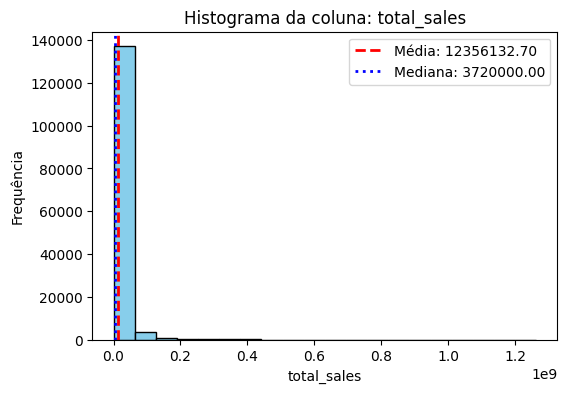

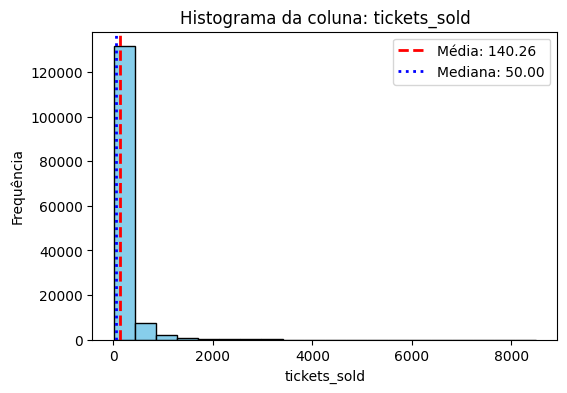

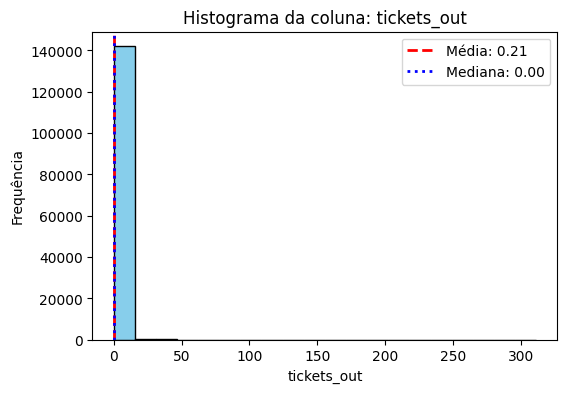

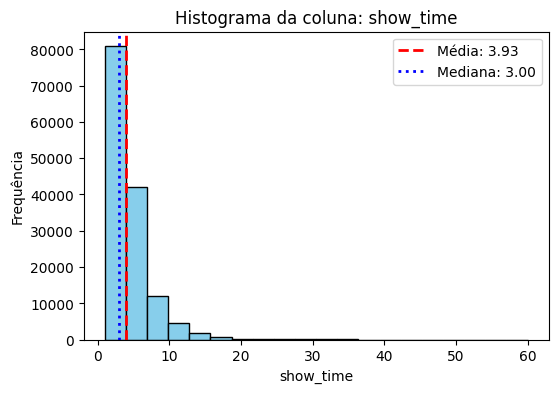

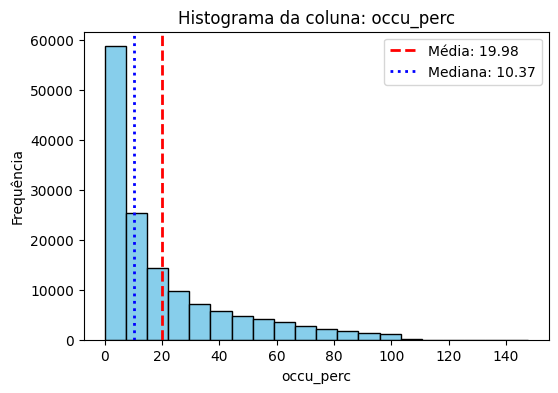

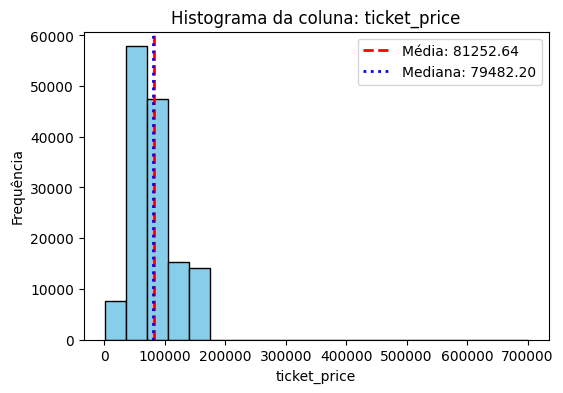

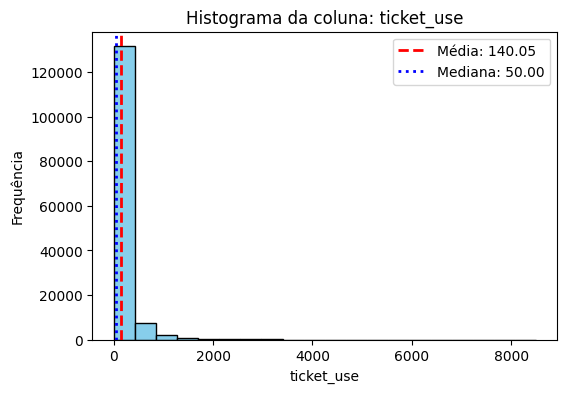

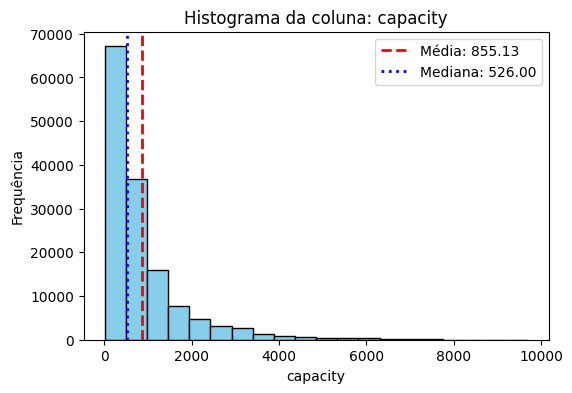

In [ ]:
for column in df.columns[dados_numericos]:
    plt.figure(figsize=(6, 4))
    plt.hist(df[column], bins=20,color='skyblue', edgecolor='black')

    media = df[column].mean()
    mediana = df[column].median()

    plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media:.2f}')
    plt.axvline(mediana, color='blue', linestyle='dotted', linewidth=2, label=f'Mediana: {mediana:.2f}')

    plt.title(f'Histograma da coluna: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')

    plt.legend()

    plt.show()

Há distribuição assimétricas das informações do Dataset em todos os gráficos.

Além disso, há uma difença entre os valores de média e mediana, sendo em alguns uma diferença destoante, que podem ser acarretados pelos outliers.

## Existem dados anômalos (os outliers)?

 Qual seria a melhor opção a ser tomada (manter os dados ou descartá-los)?

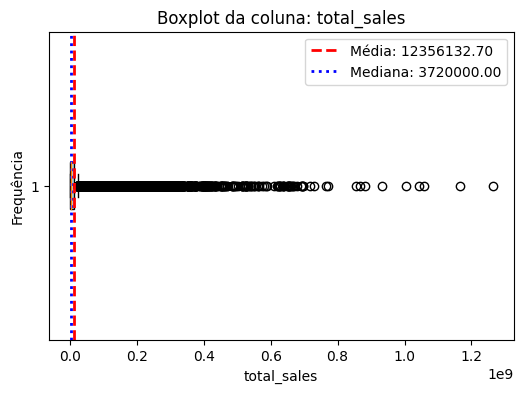

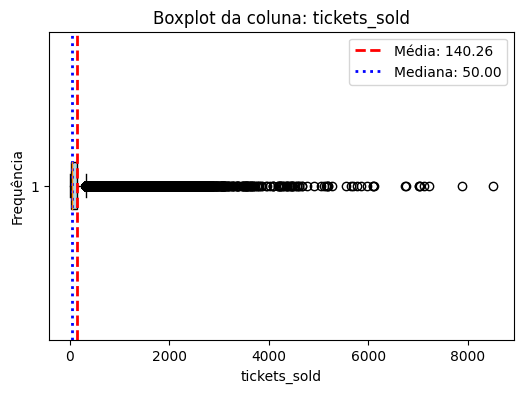

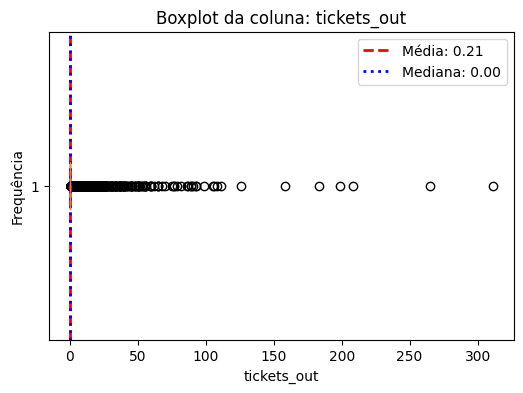

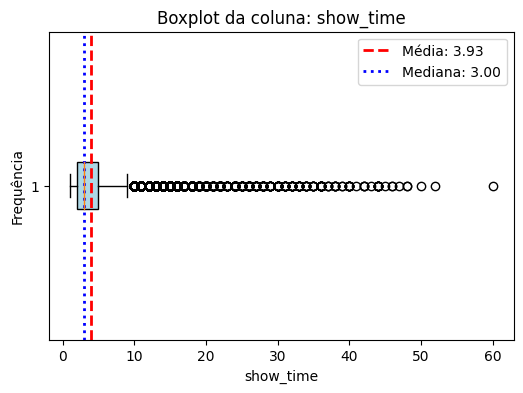

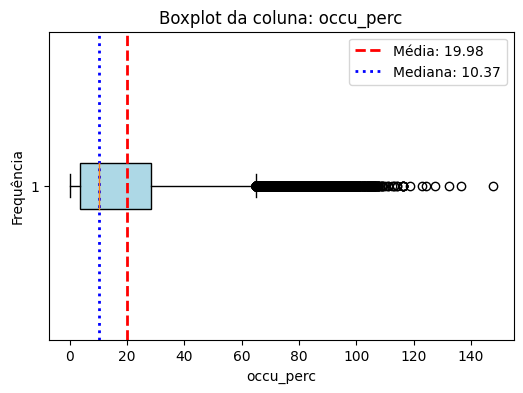

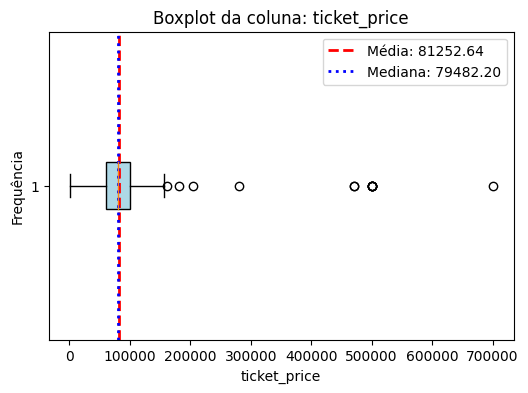

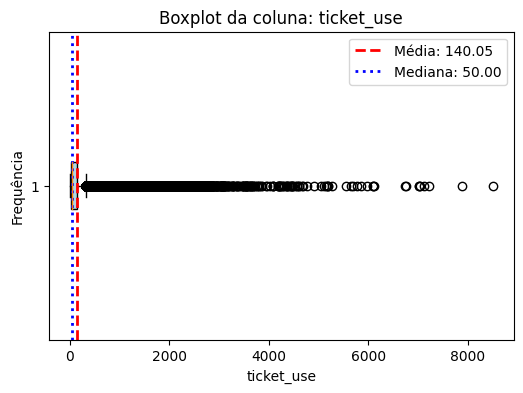

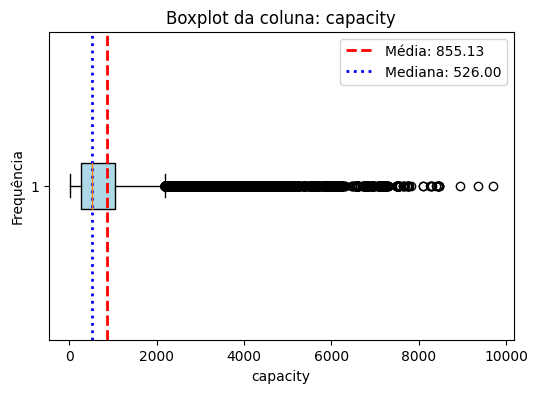

In [ ]:
for column in df.columns[dados_numericos]:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[column], vert = False, patch_artist = True, boxprops=dict(facecolor='lightblue'))

    media = df[column].mean()
    mediana = df[column].median()

    plt.axvline(media, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media:.2f}')
    plt.axvline(mediana, color='blue', linestyle='dotted', linewidth=2, label=f'Mediana: {mediana:.2f}')

    plt.title(f'Boxplot da coluna: {column}')
    plt.xlabel(column)
    plt.ylabel('Frequência')

    plt.legend()

    plt.show()

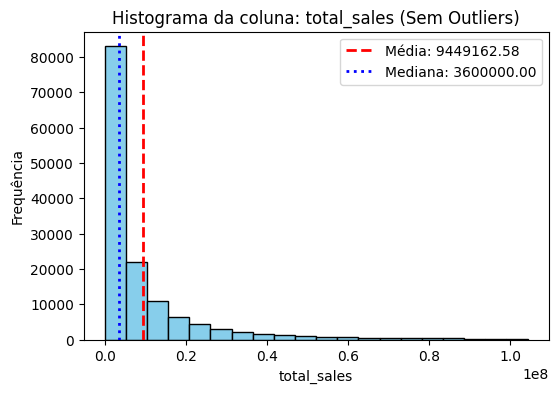

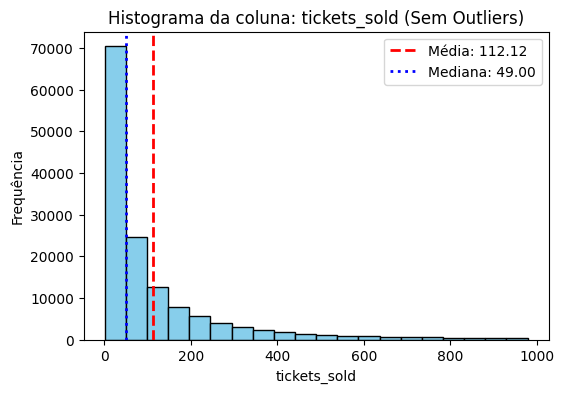

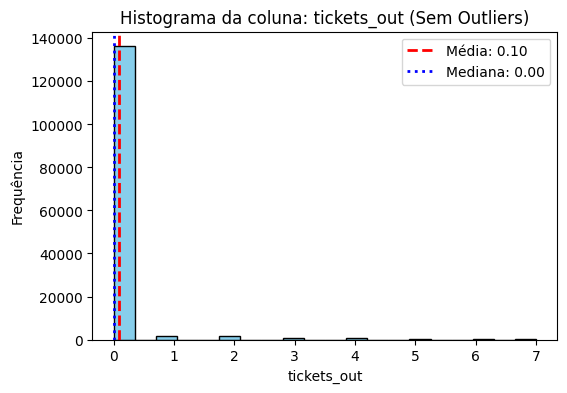

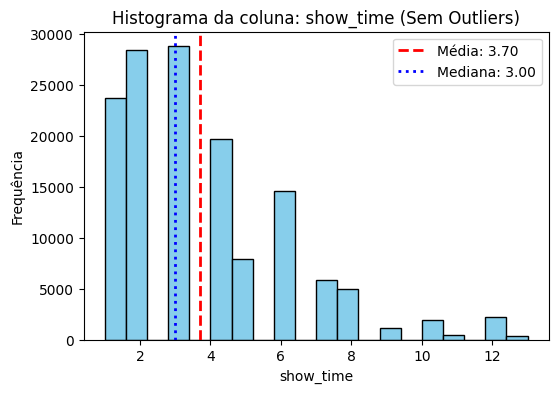

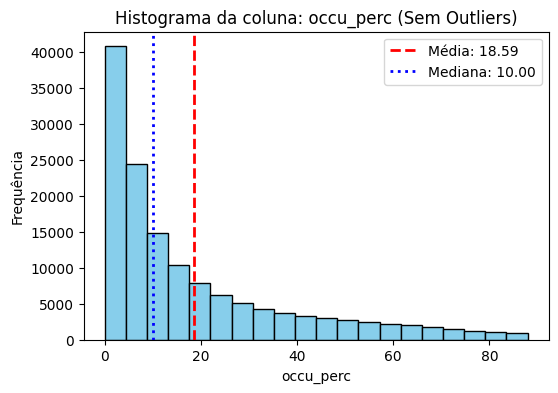

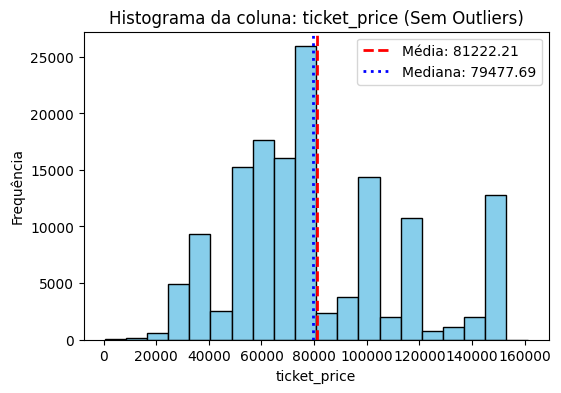

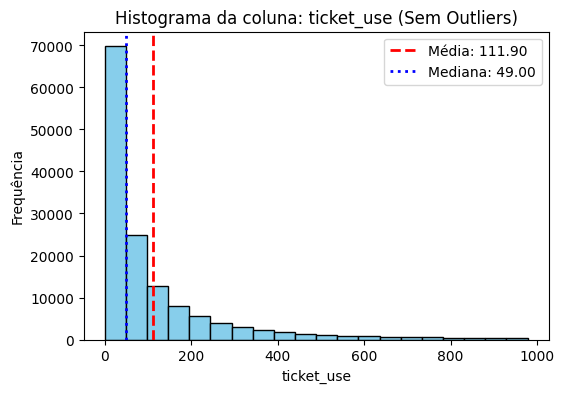

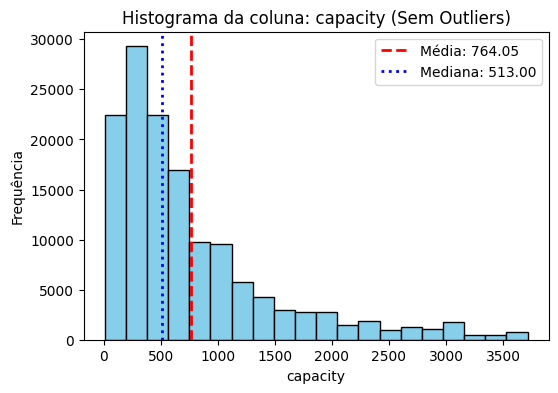

In [ ]:
for column in df.columns[dados_numericos]:

    media = df[column].mean()
    desvio_padrao = df[column].std()
    limite_superior = media + 3 * desvio_padrao
    limite_inferior = media - 3 * desvio_padrao
    df_sem_outliers = df[(df[column] <= limite_superior) & (df[column] >= limite_inferior)]

    media_sem_outliers = df_sem_outliers[column].mean()
    mediana_sem_outliers = df_sem_outliers[column].median()



    plt.figure(figsize=(6, 4))
    plt.hist(df_sem_outliers[column], bins=20, color='skyblue', edgecolor='black')

    plt.axvline(media_sem_outliers, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media_sem_outliers:.2f}')
    plt.axvline(mediana_sem_outliers, color='blue', linestyle='dotted', linewidth=2, label=f'Mediana: {mediana_sem_outliers:.2f}')

    plt.title(f'Histograma da coluna: {column} (Sem Outliers)')
    plt.xlabel(column)
    plt.ylabel('Frequência')
    plt.legend()
    plt.show()

Mesmo com a retirada dos outliers, o comportamento continua assimétrico e com grande variação entre média e mediana. Por isso, nas próximas análise, permanecemos com o Dataset original.

## Existe alguma correlação entre as variáveis numéricas?


---



Vamos aprofundar nosso entendimento entre as correlações das variáveis usando um mapa de calor:

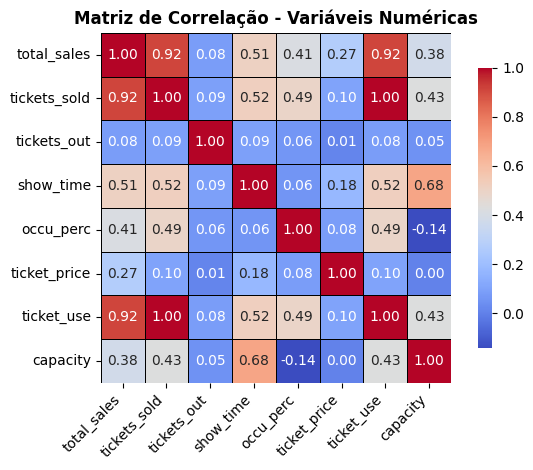

In [ ]:
heatmap = sns.heatmap(df.iloc[:, dados_numericos].corr(), annot=True, fmt=".2f", cmap='coolwarm',
                       square=True, cbar_kws={"shrink": .8}, linewidths=.5, linecolor='black')


plt.title('Matriz de Correlação - Variáveis Numéricas', fontsize=12, fontweight='bold')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

**Vamos analisar as correlações**
  - O tempo de exibição de tela (show_time) exibe uma boa correlação com total_sales, ticket_use, e ticket_sold
  - O total de vendas tem grandes correlações com show_time, occu_perc, ticket_price, ticket_use e capacity.

Agora que os dados fazem um pouco mais de sentido, vamos explorar hipóteses:

    1. Relação de ticket price com show_time. As pessoas estão preocupadas com o preço na hora escolher um filme para assistir?
    2. Quais são os principais cinemas visitados?
    3. Como é a distribuição temporal desses cinemas e filmes?
  

### 1. Relação de ticket price com ticket_use. As pessoas estão preocupadas com o preço na hora escolher um filme para assistir?

In [ ]:
filmes = df['film_code'].nunique()

print(f'Há {filmes} filmes diferentes no DataSet.')

Há 48 filmes diferentes no DataSet.


In [ ]:
vezes_assistidas = df.groupby('film_code')[['ticket_use']].sum().reset_index()
vezes_assistidas.columns = ['film_code', 'vezes_assistidas']

media_ticket_price = df.groupby('film_code')['ticket_price'].mean().reset_index()
media_ticket_price.columns = ['film_code', 'media_ticket_price']


filmes_mais_popular = pd.merge(vezes_assistidas, media_ticket_price, on='film_code')


filmes_mais_popular = filmes_mais_popular.sort_values(by='vezes_assistidas', ascending=False)


filmes_mais_popular_top = filmes_mais_popular.head(10)


tabela = PrettyTable()


tabela.field_names = ["Código do Filme", "Vezes Assistidas", "Média do Ticket Price"]
for index, row in filmes_mais_popular_top.iterrows():
    tabela.add_row([f"{row['film_code']:.0f}", row['vezes_assistidas'], f"{row['media_ticket_price']:.2f}"])

print(tabela)

+-----------------+------------------+-----------------------+
| Código do Filme | Vezes Assistidas | Média do Ticket Price |
+-----------------+------------------+-----------------------+
|       1554      |    4123532.0     |        80968.13       |
|       1484      |    1777649.0     |        76934.16       |
|       1493      |    1717088.0     |        76257.21       |
|       1482      |    1624741.0     |        75283.24       |
|       1483      |    1622292.0     |        81641.99       |
|       1481      |    1158265.0     |        67742.29       |
|       1576      |     967058.0     |        84157.60       |
|       1485      |     958766.0     |        81582.10       |
|       1556      |     634471.0     |        79053.22       |
|       1573      |     566775.0     |        84887.81       |
+-----------------+------------------+-----------------------+


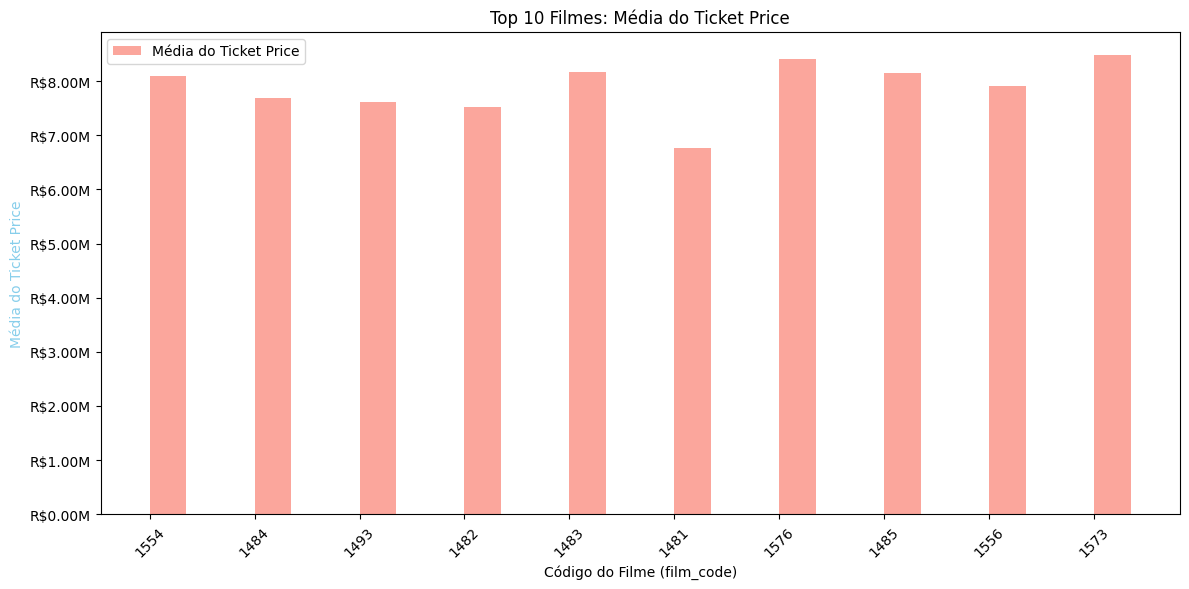

In [ ]:
from matplotlib.ticker import FuncFormatter

def formatar_em_milhoes_ticket_price(x, pos):
    return f'R${x * 1e-4:.2f}M'

fig, ax1 = plt.subplots(figsize=(12, 6))

bar_width = 0.35
index = range(len(filmes_mais_popular_top))

line2 = ax1.bar([i + bar_width for i in index], filmes_mais_popular_top['media_ticket_price'], width=bar_width, color='salmon', label='Média do Ticket Price', alpha=0.7)

ax1.set_xlabel('Código do Filme (film_code)')
ax1.set_ylabel('Média do Ticket Price', color='skyblue')

ax1.set_xticks([i + bar_width / 2 for i in index])
ax1.set_xticklabels(filmes_mais_popular_top['film_code'], rotation=45)

ax1.yaxis.set_major_formatter(FuncFormatter(formatar_em_milhoes_ticket_price))

plt.title('Top 10 Filmes: Média do Ticket Price')
ax1.legend(loc='upper left')


plt.tight_layout()
plt.show()


### 2. Quais são os principais cinemas visitados?

In [ ]:
cinema_mais_popular = df.groupby('cinema_code').agg({
    'film_code': 'nunique',
    'ticket_use':'sum',
    'total_sales': 'sum'
}).reset_index()


cinema_mais_popular.columns = ['cinema_code', 'num_filmes_unicos', 'vezes_assistidas','sum_total_sales']


cinema_mais_popular = cinema_mais_popular.sort_values(by='vezes_assistidas', ascending=False)

cinema_mais_popular_top = cinema_mais_popular.head(10)

table = PrettyTable()


table.field_names = ['Cinema Code', 'Num Filmes Únicos', 'Vezes Assistidas', 'Total Sales']


for index, row in cinema_mais_popular_top.iterrows():
    table.add_row([row['cinema_code'], row['num_filmes_unicos'], row['vezes_assistidas'], f'R${row["sum_total_sales"]:.2f}'])

print(table)

+-------------+-------------------+------------------+-------------------+
| Cinema Code | Num Filmes Únicos | Vezes Assistidas |    Total Sales    |
+-------------+-------------------+------------------+-------------------+
|     448     |         47        |     1685325      | R$214230699820.00 |
|     304     |         45        |      785762      | R$101701033000.00 |
|     163     |         48        |      612580      |  R$62847089999.00 |
|     489     |         48        |      518831      |  R$58822397000.00 |
|     518     |         46        |      494732      |  R$39879413995.00 |
|     524     |         48        |      491866      |  R$59306304992.00 |
|     344     |         42        |      449878      |  R$57322761000.00 |
|     513     |         45        |      420594      |  R$36752990000.00 |
|     210     |         44        |      389655      |  R$27949899998.00 |
|     352     |         39        |      363306      |  R$42365535000.00 |
+-------------+----------

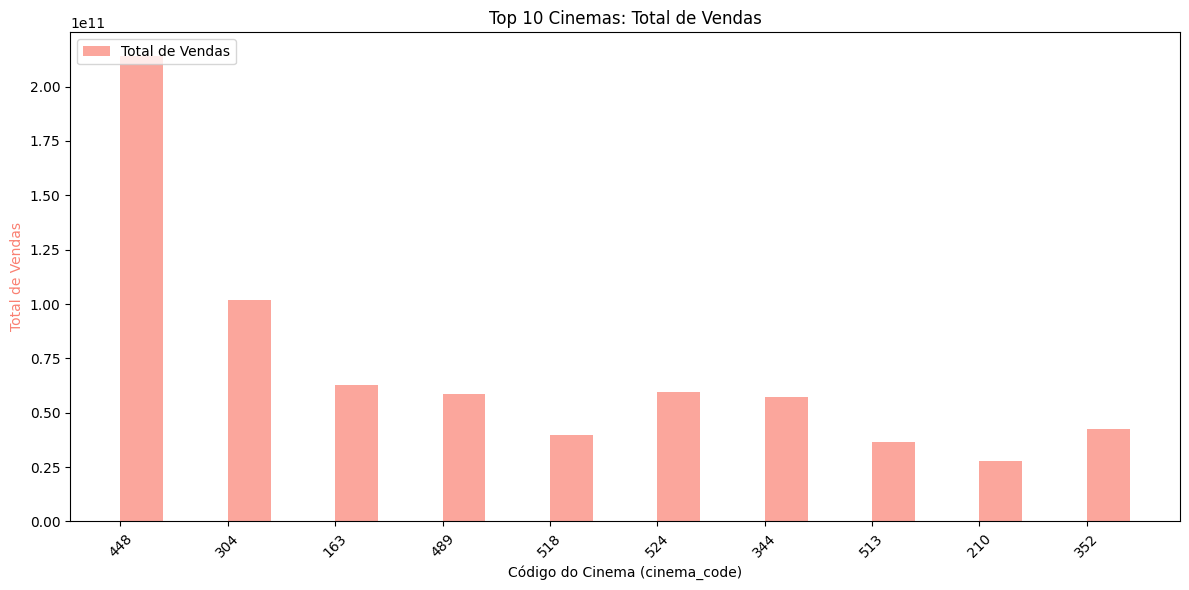

In [ ]:
fig, ax1 = plt.subplots(figsize=(12, 6))


bar_width = 0.4
index = np.arange(len(cinema_mais_popular_top))


ax1.bar(index + bar_width, cinema_mais_popular_top['sum_total_sales'], width=bar_width, color='salmon', label='Total de Vendas', alpha=0.7)


ax1.set_xlabel('Código do Cinema (cinema_code)')
ax1.set_ylabel('Total de Vendas', color='salmon')


ax1.set_xticks(index + bar_width / 2)
ax1.set_xticklabels(cinema_mais_popular_top['cinema_code'], rotation=45)


plt.title('Top 10 Cinemas: Total de Vendas')
ax1.legend(loc='upper left')


plt.tight_layout()
plt.show()

Infelizmente, não é possível determinar uma correlação clara entre as duas análises iniciais.

### 3. Como é a distribuição temporal desses cinemas e filmes?

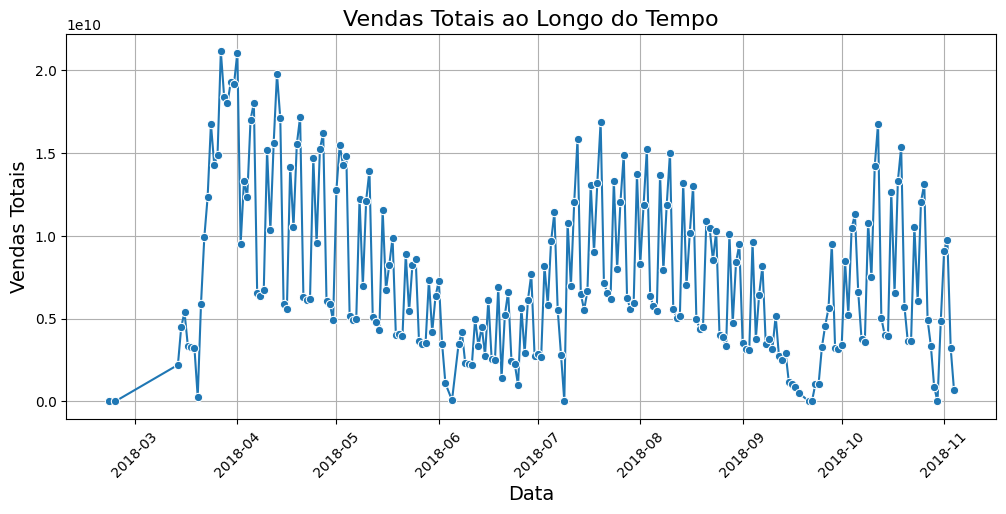

In [ ]:
vendas_por_data = df.groupby('date')['total_sales'].sum().reset_index()

plt.figure(figsize=(12, 5))
sns.lineplot(x='date', y='total_sales', data=vendas_por_data, marker='o')

plt.title('Vendas Totais ao Longo do Tempo', fontsize=16)
plt.xlabel('Data', fontsize=14)
plt.ylabel('Vendas Totais', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

<ipython-input-104-35072f265b6d>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  vendas_por_mes = df.groupby(pd.Grouper(key='date', freq='M'))['total_sales'].sum().reset_index()


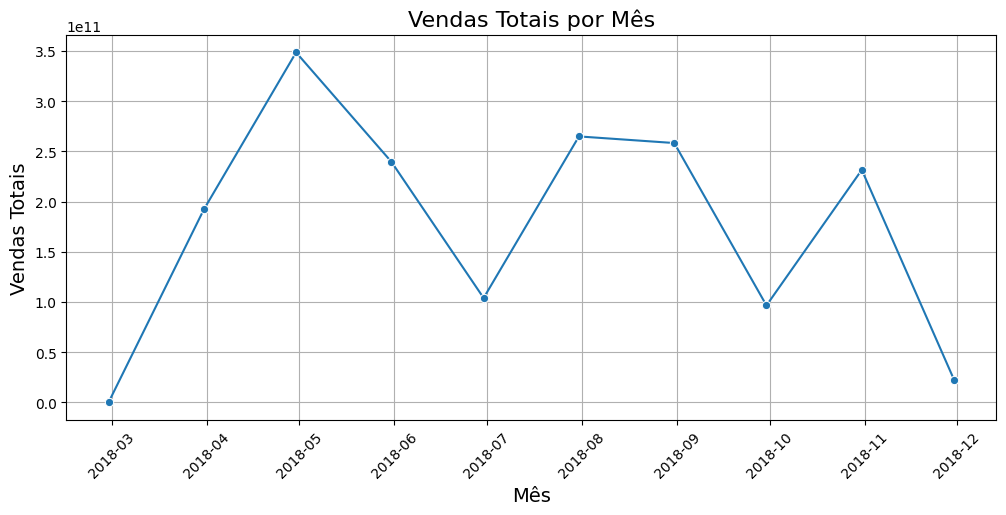

In [ ]:
vendas_por_mes = df.groupby(pd.Grouper(key='date', freq='M'))['total_sales'].sum().reset_index()

# Plotando o gráfico de linha
plt.figure(figsize=(12, 5))
sns.lineplot(x='date', y='total_sales', data=vendas_por_mes, marker='o')

# Customizando o gráfico
plt.title('Vendas Totais por Mês', fontsize=16)
plt.xlabel('Mês', fontsize=14)
plt.ylabel('Vendas Totais', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

In [ ]:
df['Média móvel - 15 dias'] = df['total_sales'].rolling(window=15).mean()
df['Mediana móvel - 15 dias'] = df['total_sales'].rolling(window=15).median()
df['Desvio padrão móvel - 15 dias'] = df['total_sales'].rolling(window=15).std()

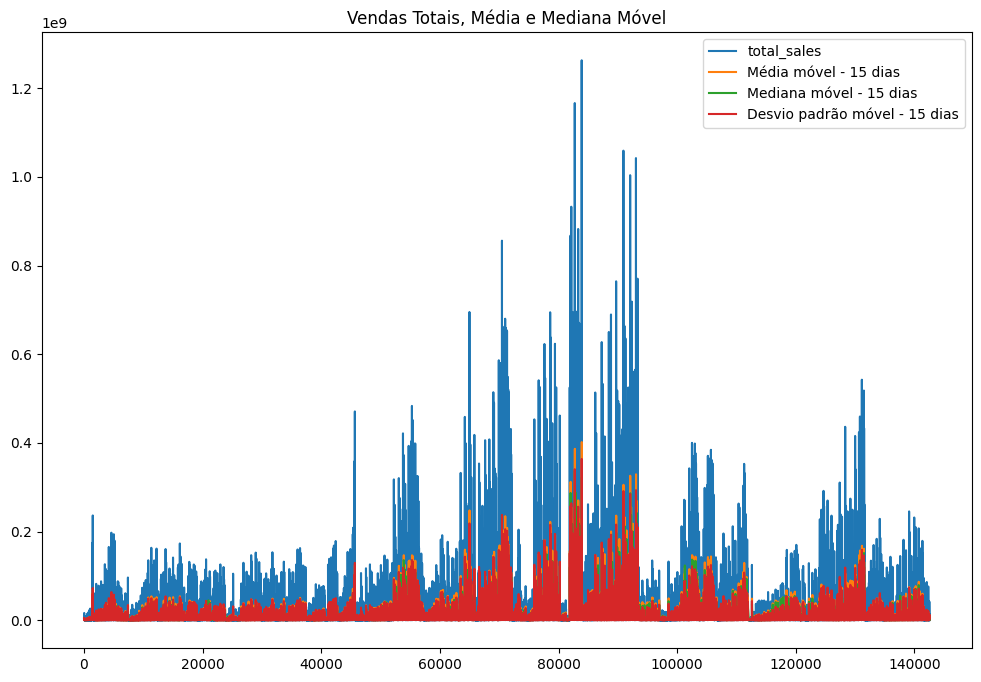

In [ ]:
plt.rcParams['figure.figsize'] = [12,8]


df[['total_sales','Média móvel - 15 dias','Mediana móvel - 15 dias','Desvio padrão móvel - 15 dias']].plot()

plt.title('Vendas Totais, Média e Mediana Móvel')

plt.show()